         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 

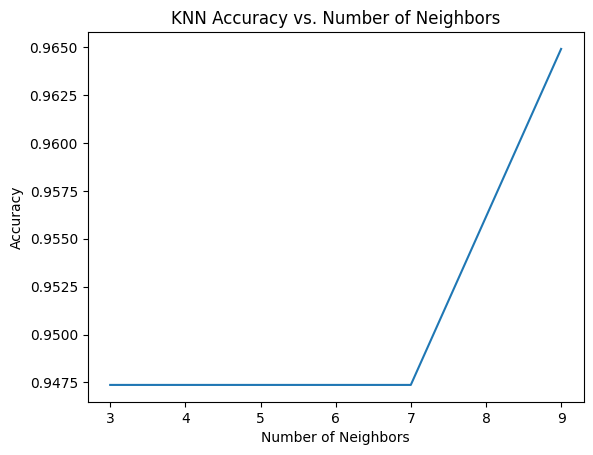

Optimal number of neighbors: 9
Logistic Regression Accuracy: 0.9736842105263158
Confusion Matrix for Logistic Regression:
 [[70  1]
 [ 2 41]]
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

KNN Accuracy: 0.9473684210526315, Logistic Regression Accuracy: 0.9736842105263158
Logistic Regression performs better.
Best parameters for KNN: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}, Best cross-validated accuracy: 0.9648351648351647
Cross-validated accuracy for Logistic Regression: 0.9806862288464524


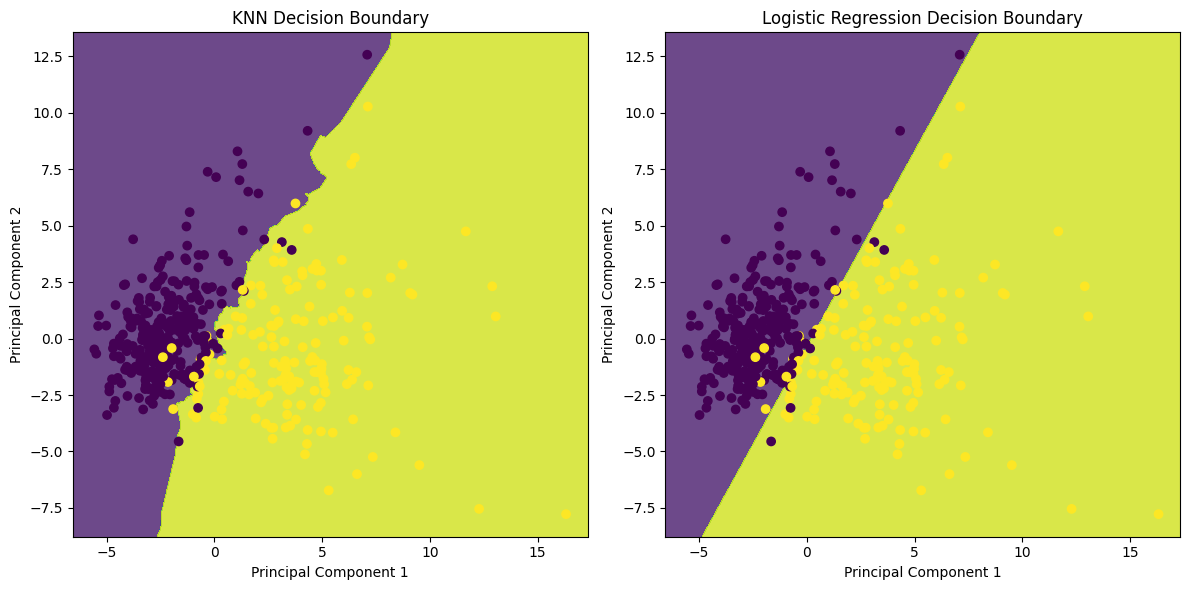

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Exercise 1: Data Exploration and Preprocessing

# Load the dataset
file_path = '/content/Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv'
data = pd.read_csv(file_path)

# Display the first 10 rows and check for missing values
print(data.head(10))
print(data.isnull().sum())

# Explore the distribution of features using descriptive statistics
print(data.describe())

# Summarize the dataset
num_instances = data.shape[0]
num_features = data.shape[1]
missing_values = data.isnull().sum().sum()
print(f'Instances: {num_instances}, Features: {num_features}, Missing Values: {missing_values}')

# Drop irrelevant columns (e.g., id and unnamed columns)
data.drop(columns=['id'], inplace=True)
if 'Unnamed: 32' in data.columns:
    data.drop(columns=['Unnamed: 32'], inplace=True)

# Convert target variable diagnosis (M = Malignant, B = Benign) into numerical format
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Compute variance only for numeric columns (excluding 'diagnosis')
features_only = data.drop(columns=['diagnosis'])  # Drop the target column before calculating variance
variance = features_only.var()  # Variance for numeric features
high_variance_features = variance.nlargest(5)
print(f'Features with the highest variance: \n{high_variance_features}')

# Normalize or standardize the features
features = data.drop('diagnosis', axis=1)
target = data['diagnosis']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the dataset into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Check shapes and types of training data
print("X_train shape:", X_train.shape)  # Should be (n_samples, n_features)
print("y_train shape:", y_train.shape)  # Should be (n_samples,)

# Exercise 2: Implementing the K-Nearest Neighbors (KNN) Model

# Implement a KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train, y_train)

# Predict the tumor diagnosis on the test data
y_pred_knn = knn.predict(X_test)

# Calculate the accuracy of the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn}')

# Present the confusion matrix for the predictions
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix for KNN:\n", cm_knn)

# Experiment with Different Values of n_neighbors
neighbors = [3, 5, 7, 9]
accuracies = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plotting accuracy vs. number of neighbors
plt.plot(neighbors, accuracies)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.show()

optimal_n_neighbors = neighbors[np.argmax(accuracies)]
print(f'Optimal number of neighbors: {optimal_n_neighbors}')

# Exercise 3: Implementing Logistic Regression

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# Predict the test data labels
y_pred_log_reg = log_reg.predict(X_test)

# Calculate the accuracy of the Logistic Regression model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'Logistic Regression Accuracy: {accuracy_log_reg}')

# Present the confusion matrix and classification report for Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Confusion Matrix for Logistic Regression:\n", cm_log_reg)

report_log_reg = classification_report(y_test, y_pred_log_reg)
print("Classification Report for Logistic Regression:\n", report_log_reg)

# Comparison of KNN and Logistic Regression performance
print(f'KNN Accuracy: {accuracy_knn}, Logistic Regression Accuracy: {accuracy_log_reg}')

if accuracy_knn > accuracy_log_reg:
    print("KNN performs better.")
else:
    print("Logistic Regression performs better.")

# Exercise 4: Hyperparameter Tuning and Cross-Validation

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan or Euclidean distance
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search_knn.fit(X_train, y_train)

best_params_knn = grid_search_knn.best_params_
best_accuracy_knn = grid_search_knn.best_score_
print(f'Best parameters for KNN: {best_params_knn}, Best cross-validated accuracy: {best_accuracy_knn}')

cross_val_accuracy_log_reg = cross_val_score(log_reg, features_scaled, target, cv=5).mean()
print(f'Cross-validated accuracy for Logistic Regression: {cross_val_accuracy_log_reg}')

# Exercise 5: Decision Boundary Visualization

pca = PCA(n_components=2)
X_pca = pca.fit_transform(features_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, target, test_size=0.2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
knn.fit(X_train_pca, y_train_pca)
xx, yy = np.meshgrid(np.arange(X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1, 0.01),
                     np.arange(X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1, 0.01))
Z_knn = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z_knn = Z_knn.reshape(xx.shape)
plt.contourf(xx, yy, Z_knn, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pca)
plt.title('KNN Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
log_reg.fit(X_train_pca, y_train_pca)
Z_log_reg = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z_log_reg = Z_log_reg.reshape(xx.shape)
plt.contourf(xx, yy, Z_log_reg, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pca)
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()
